In [12]:
import pickle as pkl
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from scipy.linalg import expm, sinm, cosm

In [10]:
def compute_pdf_within_range(x_vals, s, A):
    '''
    compute_pdf_within_range
    :param x_vals:
    :param s:
    :param A:
    :return:
    '''
    pdf_list = []
    for x in x_vals:
        pdf_list.append(compute_pdf(x, s, A).flatten())

    return pdf_list

def compute_cdf_within_range(x_vals, s, A):
    '''
    compute_cdf_within_range
    :param x_vals:
    :param s:
    :param A:
    :return:
    '''
    pdf_list = []
    for x in x_vals:
        pdf_list.append(compute_cdf(x, s, A).flatten())

    return pdf_list

def compute_pdf(x, s, A):
    '''
    x: the value of pdf
    s: inital probs
    A: Generative matrix
    '''
    A0 = -np.dot(A, np.ones((A.shape[0], 1)))
    return np.dot(np.dot(s, expm(A * x)), A0)


def compute_cdf(x, s, A):
    '''
    x: the value of pdf
    s: inital probs
    A: Generative matrix
    '''
    A0 = -np.dot(A, np.ones((A.shape[0], 1)))
    return 1 - np.sum(np.dot(s, expm(A * x)))



In [6]:
path = r'C:\Users\user\workspace\data\ph_random\ph_for_feed_forward'
files = os.listdir(path)
data = pkl.load(open(os.path.join(path, files[0]), 'rb'))

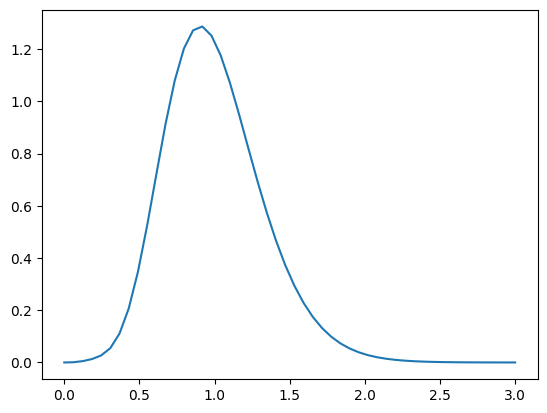

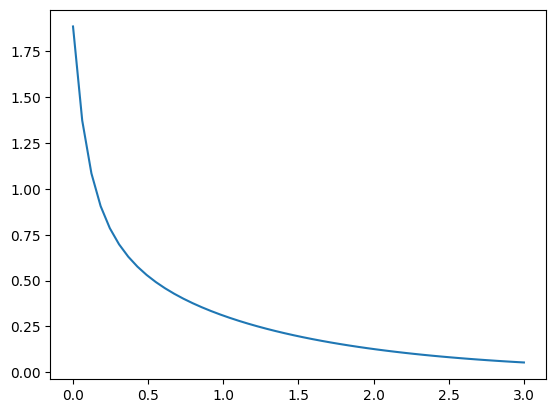

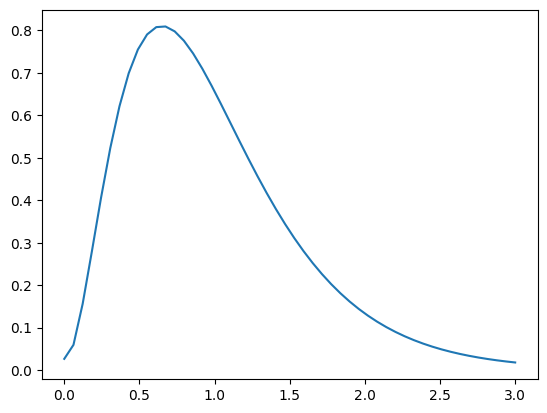

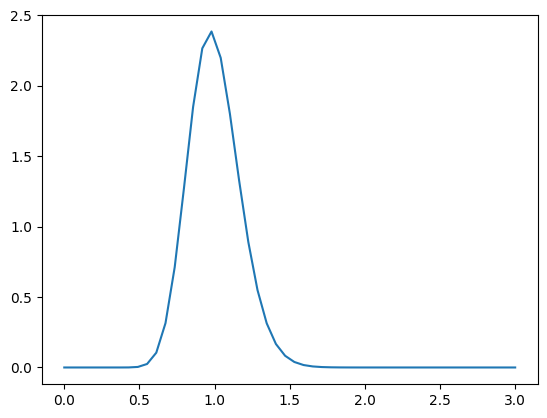

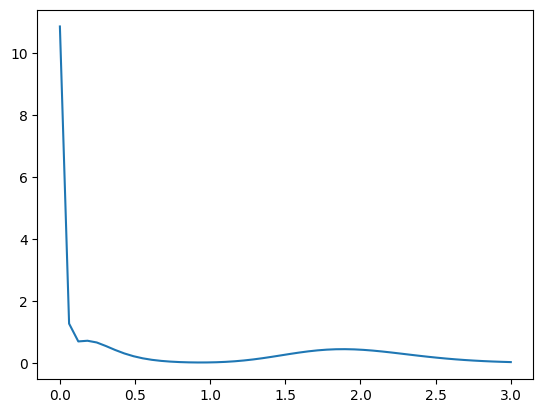

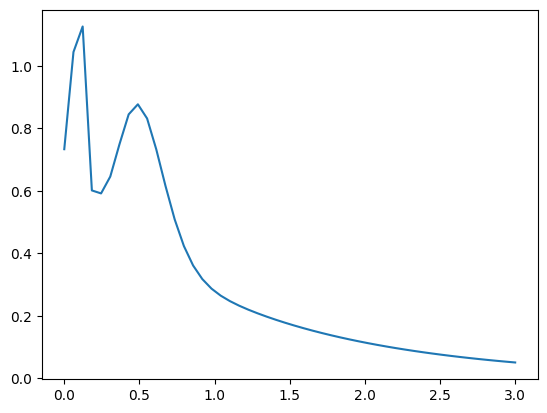

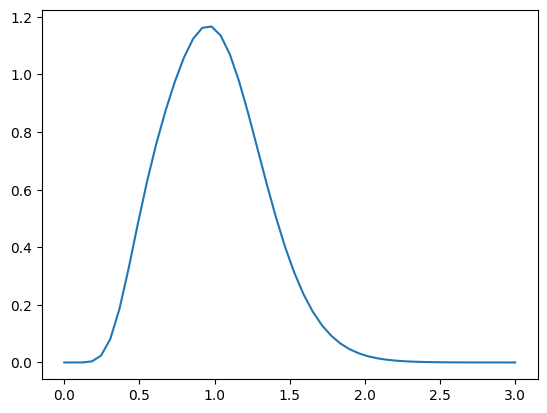

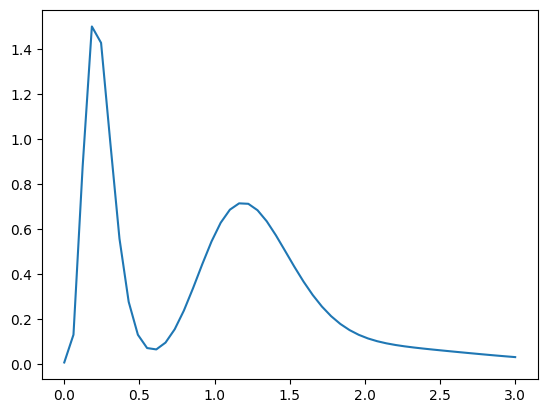

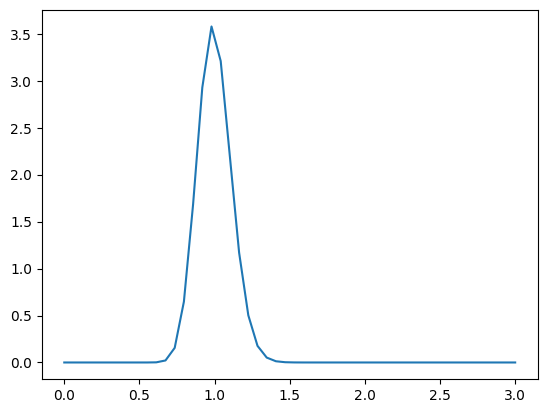

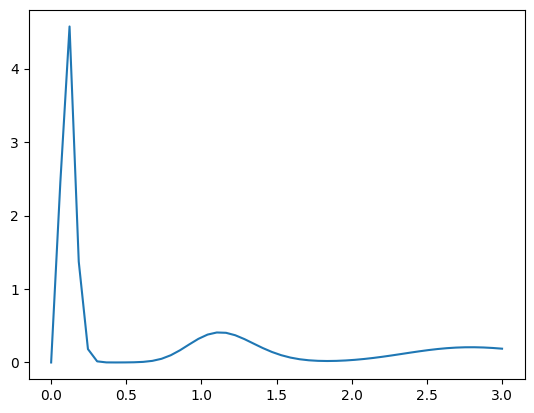

In [14]:
for ind in range(10):
    data = pkl.load(open(os.path.join(path, files[ind]), 'rb'))

    x_vals = np.linspace(0,3,50)
    y_vals = compute_pdf_within_range(x_vals, data[0], data[1])

    plt.figure()
    plt.plot(x_vals, y_vals)
    plt.show()